# Required Lab -- week of March 19th -- 23rd

Make an animated plot in matplotlib that recreates an analogue clock. 

Make the minute and hour markers in black.  Put numbers (text field) at the hour markers.  Make the hour hand short and fat, the minute hand long and thin, both in black.  Make the second hand in red. 

Set the time on your clock to local time -- use the **time** library. 

Make both a (normal) 12-hour version of your clock, and a 24-hour version. 

In [1]:
%matplotlib nbagg
import time
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

<IPython.core.display.Javascript object>


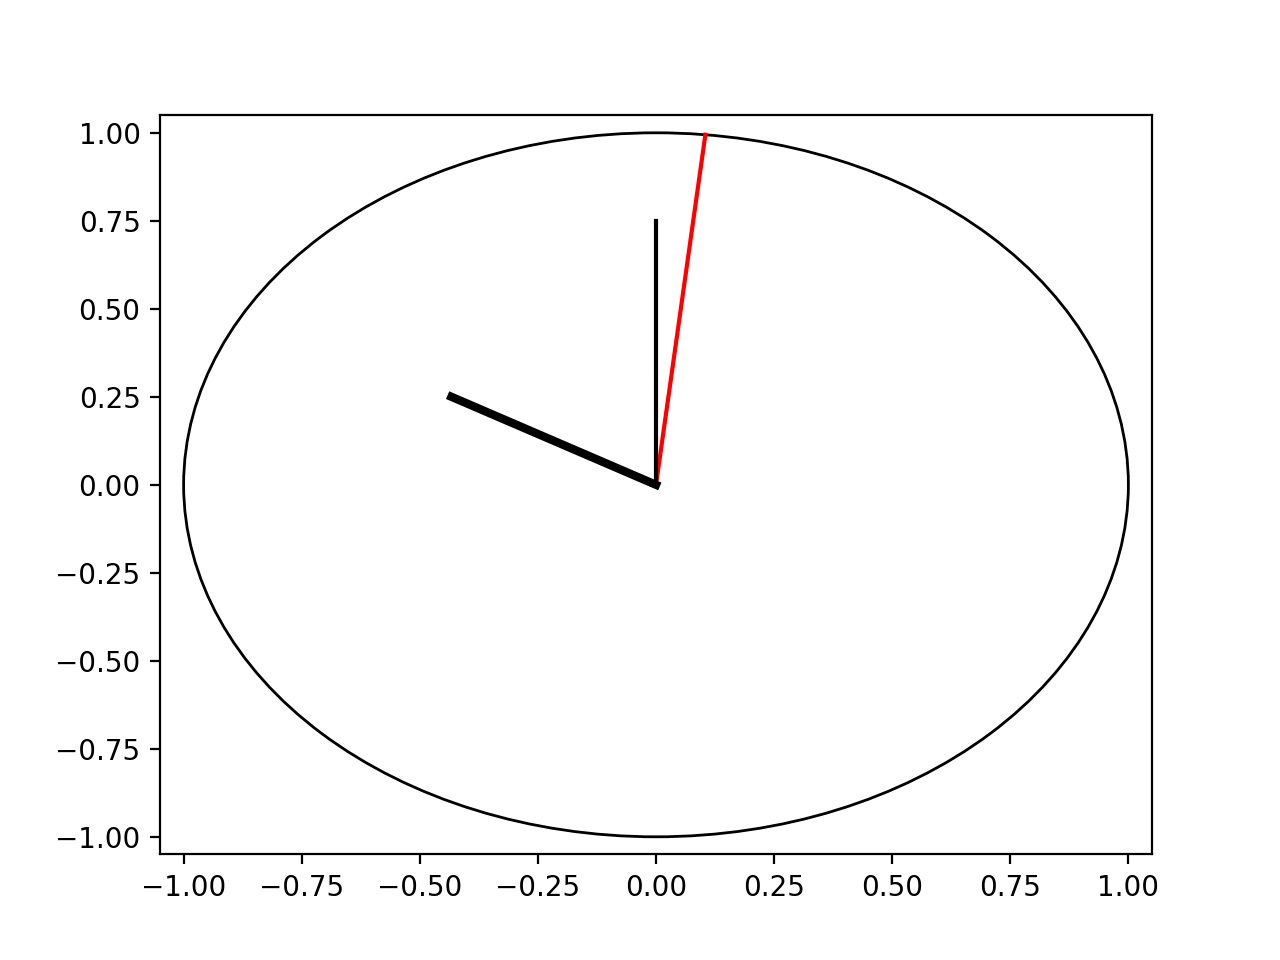

9 34 16


In [2]:
fig, ax = plt.subplots()

## initial plot. bearing, initial arm, circle of radius 1.

circ = plt.Circle((0, 0), 1, color='black', fill=False)
ax.add_artist(circ)
ax.set_xlim(-1.05, 1.05)
ax.set_ylim(-1.05, 1.05)

hours, minutes, seconds = datetime.now().strftime('%H:%M:%S').split(":")
hours = int(hours)
minutes = int(minutes)
seconds = int(seconds)
print(hours-12, minutes, seconds)

s_theta = np.pi/2 + seconds * 2 * np.pi / 60
m_theta = np.pi/2 + minutes * 2 * np.pi / 60
h_theta = np.pi/2 + hours * 2 * np.pi / 12

theta = 2*np.pi/360 * hours
second_hand, = plt.plot([0, np.sin(s_theta)], [0, np.cos(s_theta)], 'r')
minute_hand, = plt.plot([0, np.sin(m_theta)], [0, np.cos(m_theta)], 'black')
hour_hand, = plt.plot([0, np.sin(h_theta)*0.5], [0, np.cos(h_theta)*0.5], 'black', linewidth=3)

def init():
    hours, minutes, seconds = datetime.now().strftime('%H:%M:%S').split(":")
    hours = int(hours)
    minutes = int(minutes)
    seconds = int(seconds)
    
    s_theta = seconds * 2 * np.pi / 60
    m_theta = minutes * 2 * np.pi / 60
    h_theta = hours * 2 * np.pi / 12
    
    second_hand.set_xdata([0, np.sin(s_theta)])
    second_hand.set_ydata([0, np.cos(s_theta)])
    
    minute_hand.set_xdata([0, np.sin(m_theta)*0.75])
    minute_hand.set_ydata([0, np.cos(m_theta)*0.75])
    
    hour_hand.set_xdata([0, np.sin(h_theta)*0.5])
    hour_hand.set_ydata([0, np.cos(h_theta)*0.5])
    
    return [second_hand, minute_hand, hour_hand]

def animate(i):
    hours, minutes, seconds = datetime.now().strftime('%H:%M:%S').split(":")
    hours = int(hours)
    minutes = int(minutes)
    seconds = int(seconds)
    
    s_theta = seconds * 2 * np.pi / 60
    m_theta = minutes * 2 * np.pi / 60
    h_theta = hours * 2 * np.pi / 12
    
    second_hand.set_xdata([0, np.sin(s_theta)])
    second_hand.set_ydata([0, np.cos(s_theta)])
    
    minute_hand.set_xdata([0, np.sin(m_theta)*0.75])
    minute_hand.set_ydata([0, np.cos(m_theta)*0.75])
    
    hour_hand.set_xdata([0, np.sin(h_theta)*0.5])
    hour_hand.set_ydata([0, np.cos(h_theta)*0.5])
    
    return [second_hand, minute_hand, hour_hand]
    
## interval is ms delay between frames
ani = animation.FuncAnimation(fig, animate, init_func=init, interval=1000, blit=True )

plt.show()